<a href="https://colab.research.google.com/github/vlad-uve/CAE-MNIST/blob/main/notebooks/CAE_experiment_2(latent_dim).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Autoencoder (CAE) — Experiment #2: Latent Space Dimensionality

This notebook explores the impact of varying the size of the latent space in the CAE architecture on the reconstruction quality of MNIST digits and training behavior.

---

## 📌 Objective

To investigate how different latent dimension sizes affect the model"s ability to reconstruct MNIST digits, as well as the influence on training dynamics. Results are compared against the baseline model.

---

## 🔁 Experiment Workflow

1. Clone the project and configure dependencies
2. Define multiple CAE variants with different latent diemnsion size configurations
3. Train each variant over 20 epochs using the Adam optimizer
4. Analyze training and validation losses, and compare reconstruction quality with the base line model
5. Make conclusions
6. Export results to GitHub

---

## 📊 Key Findings

- Latent space size is a significant driver of autoencoder reconstruction performance
- Small latent dimension model marginally reconstruction images but well compress
- Large dimension models waste resources without significant improve in reconstruction, compared to those with moderate space

---

## 1. 🔧 Setup

This section prepares the environment for running the experiment.

- Clone the GitHub repository  
- Import model classes and utility functions from `src/`  
- Import necessary libraries  
- Define constants

## 2. 🧠 Define Experiment Models

This section defines three CAE variants to evaluate the effect of varying latent space dimensionality:

- `experiment_2_model_1`: `latent_dim = 2` (Very small latent space)  
- `experiment_2_model_2`: `latent_dim = 8` (Small latent space)  
- `experiment_2_model_3`: `latent_dim = 64` (Large latent space)  

🟩 **Baseline model latent dimension:** `latent_dim = 32`

All other architectural and training parameters remain consistent with the baseline model:

- Convolutional filters: `[32, 32, 64]`  
- Batch sizes: 32 (train) / 500 (validation)  
- Activation: ReLU  
- Optimizer: Adam (`lr = 1e-3`)  
- Scheduler: `ReduceLROnPlateau`
- Epochs: 20 epochs

## 3. 🏋️‍♀️ Train Experiment Models

Each architecture defined in this experiment is trained sequentially using the run_model_training() function.

For each configuration:

- A model is initialized with its respective n_channels setting
- The optimizer (Adam) and scheduler (ReduceLROnPlateau) are redefined to track validation loss
- The model is trained for 20 epochs using the same dataloaders as in the baseline
- Training and validation losses are logged
- The final model and its loss history are stored for later analysis and comparison

## 4. 🔍 Results and Observations

### 4.1 📉 Loss Curve Analysis

- All models reached a plateau within the first 10 epochs, confirming that 20 training epochs is sufficient for the experiment
- The **large latent space model** (`latent_dim = 64`) achieved nearly identical loss values to the **baseline** (`latent_dim = 32`), offering no meaningful gain despite doubling the latent size  
- The **small** (`latent_dim = 8`) and **very small** (`latent_dim = 2`) latent space models resulted in significantly higher reconstruction loss, indicating degraded representational capacity  
- Although all models followed similar convergence patterns and showed no signs of overfitting, the larger the latent space, the more stable and uniform the training and validation loss curves became


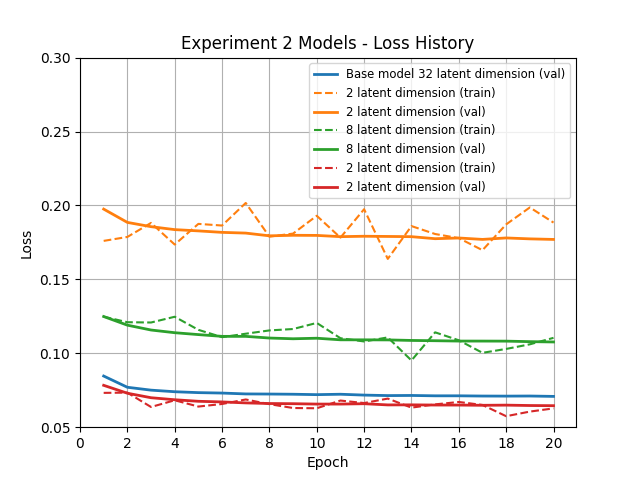

In [ ]:
display(Image(filename="CAE-MNIST/outputs/experiment_2_files/experiment_2_image_loss.png"))

### 4.2 📷 Reconstruction Quality Analysis

- The **very small latent space (2)** fails to preserve key digit features. Digits such as 4 and 9, or 3 and 8, are nearly indistinguishable. The model shows poor feature retention and blurred reconstructions.  
- The **small latent space (8)** performs better, but still lacks enough capacity to reliably differentiate fine digit structures. Reconstructions are still soft, and closely shaped digits remain ambiguous.  
- The **large latent space (64)** performs very well, producing sharp and clean reconstructions. However, its improvement over the **baseline (latent_dim = 32)** is minimal — nearly imperceptible to the human eye.  
- Despite having twice the capacity of the baseline, the model with large latent space does not offer enough added value to justify its significantly higher resource cost.


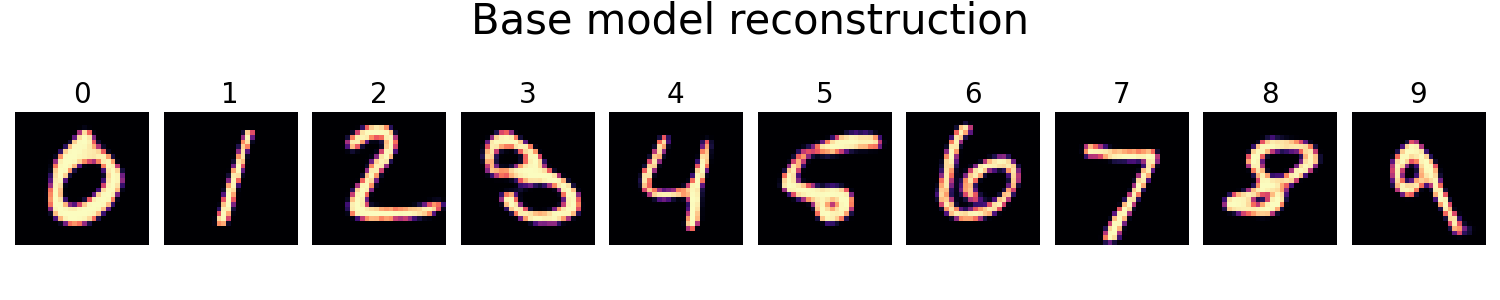

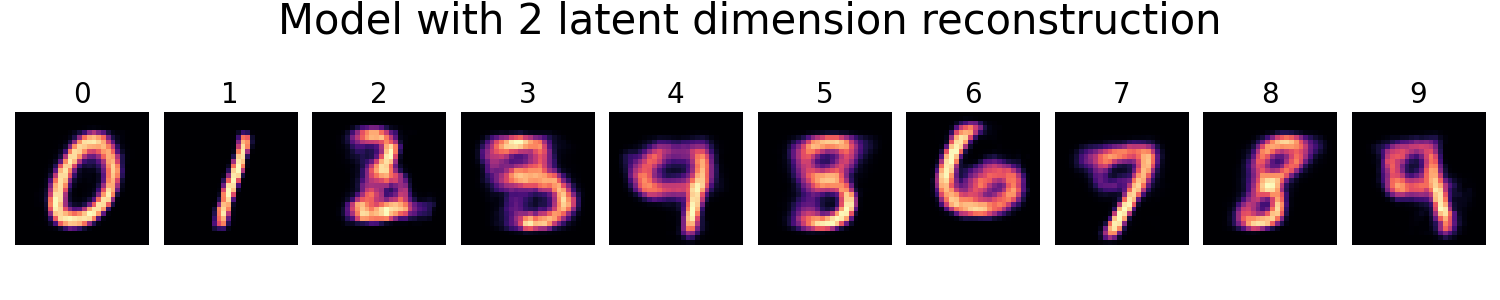

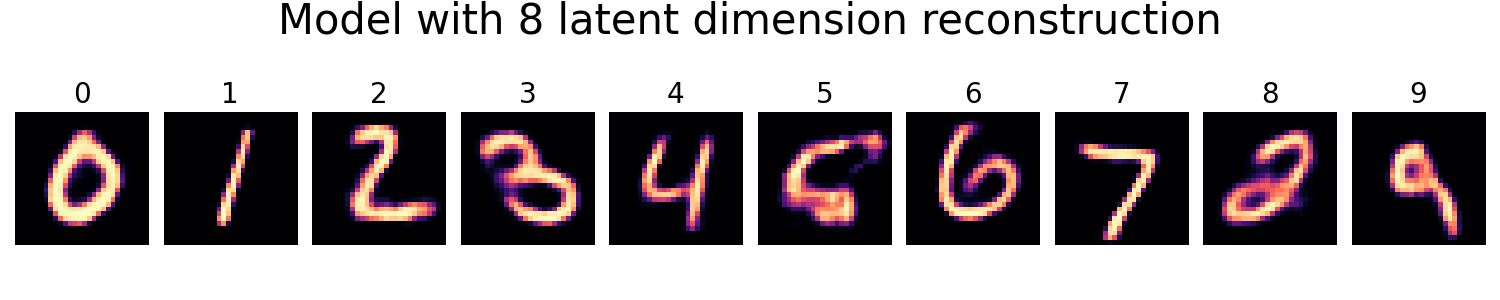

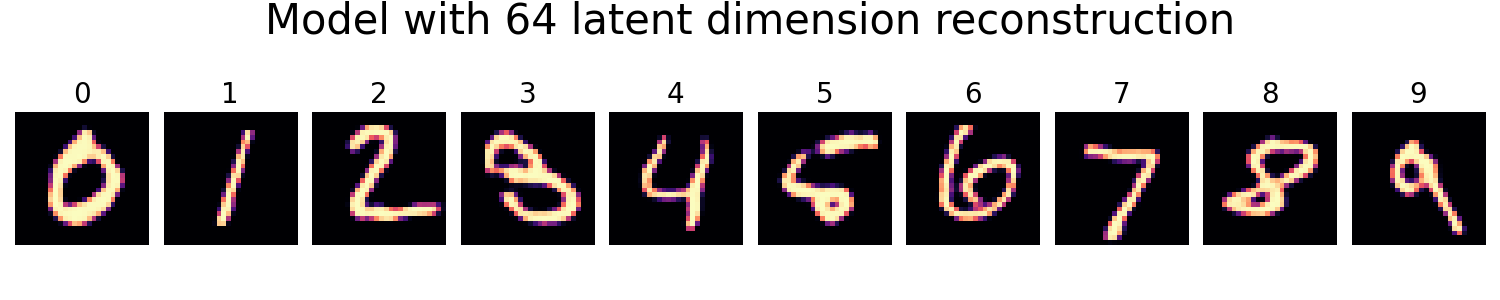

In [10]:
display_reconstruction_images(2, len(experiment_2_models))

### 4.3 🧮 Model Complexity Analysis
Larger latent dimensions substantially effect model complexity. Very small space has 2 times as fewer parameters than the base model, and large space is approximatelt one and half times as more complex, reaching over 203K parameters (trainable and not).

- Parameters of model with 2 latent dimension: ~76K
- Parameters of model with 8 latent dimension:** ~88K
- Parameters of **base model** with 32 laten diemnsion: ~137K
- Parameters of model with 64 latent dimension: ~203K

## 5. ✅ Conclusion

This experiment demonstrates that **latent dimension size significantly affects reconstruction quality**. Extremely low-dimensional spaces degrade performance, while overly large ones are **wasteful and inefficient**.

Very large latent dimension models **don't differ in reconstruction loss** as much as models with the small. But large latent space **substantially increases number of model paprameters and contradicts the objective on the compact encoding**.

The **baseline configuration (`latent_dim = 32`) strikes the best balance** between compact representation, complexity and reconstruction accuracy, making it the most practical choice for this task.

---
---

# 🛠️ Notebook Workflow
The sections below contain the actual code used to define, train, and evaluate the variant CAE models for this experiment. This includes model setup, training logic, and result generation. These blocks serve as the working core of the notebook and support the summary presented above

## 1. 🔧 Setup

In [2]:
from getpass import getpass

# get repo url
token = getpass("Paste your GitHub token")
user_name = 'vlad-uve'
repo_name = 'CAE-MNIST'
repo_url = f"https://{token}@github.com/{user_name}/{repo_name}.git"

# clone the repo
!git config --global user.email "vladislav.yushkevich.uve@gmail.com"
!git config --global user.name "vlad_uve"
!git clone {repo_url}

# append system path
import sys
sys.path.append('/content/CAE-MNIST')

Paste your GitHub token··········
Cloning into 'CAE-MNIST'...
remote: Enumerating objects: 907, done.
remote: Counting objects: 100% (244/244), done.
remote: Compressing objects: 100% (188/188), done.
remote: Total 907 (delta 132), reused 117 (delta 56), pack-reused 663 (from 2)
Receiving objects: 100% (907/907), 33.39 MiB | 24.87 MiB/s, done.
Resolving deltas: 100% (456/456), done.


In [3]:
# import core model components
from src.model import AutoEncoder, Encoder, Decoder

# import training utilities
from src.train import train_model, validate_model, run_model_training

# import data loading functions
from src.data import get_train_dataloader, get_validation_dataloader

# import evaluation helpers
from src.evaluation import get_experiment_reconstructions, get_image_samples

# import plotting functions
from src.plotting import plot_digits_row, plot_experiment_reconstructions, plot_experiment_history, display_reconstruction_images

# import exporting functions
from src.export import save_experiment_files, export_experiment_files

In [4]:
# OS and file utilities
import os
import shutil

# PyTorch core modules
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Data loading and transformations
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Model summary utility
from torchsummary import summary

# Learning rate scheduler
from torch.optim.lr_scheduler import ReduceLROnPlateau

# Plotting
import matplotlib.pyplot as plt

# Import utility to display images directly in notebook
from IPython.display import Image, display

In [5]:
# set device to GPU if available, otherwise use CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# set random seed for reproducibility
torch.manual_seed(0)

## 2. 🧠 Define Experiment Models



In [6]:
# load baseline model description from file
base_model_files_path = '/content/CAE-MNIST/outputs/base_model_files'
with open(os.path.join(base_model_files_path, 'base_description.txt'), 'r') as f:
    base_description = f.read()

# print baseline model description
print(base_description)

Baseline model configuration:
- Architecture: n_channels = [32, 32, 64], latent_dim = 32
- Batch normalization: False
- Activation function: ReLU
- Optimizer: Adam (lr = 1e-3)
- Scheduler: ReduceLROnPlateau (patience = 3, factor = 0.5, threshold = 1e-3)
- Training: 20 epochs
- Train batch size: 32
- Validation batch size: 500


In [7]:
# define base model architecture and training parameters
base_n_channels = [32, 32, 64]
base_train_batch_size = 32
base_validation_batch_size = 500
base_num_epoch = 20

# initialize base dataloaders
base_train_dataloader = get_train_dataloader(batch_size=base_train_batch_size, data_dir='../data')
base_validation_dataloader = get_validation_dataloader(batch_size=base_validation_batch_size, data_dir='../data')

100%|██████████| 9.91M/9.91M [00:00<00:00, 39.7MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.13MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 9.72MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.98MB/s]


In [8]:
# define experiment 2 description: testing latent dimension configurations
experiment_2_description = """
Experiment 2: effect of latent space dimensionality
Three alternative settings:
experiment_2_model_1: latent_dim = 2
experiment_2_model_2: latent_dim = 8
experiment_2_model_3: latent_dim = 64
Other parameters are the same as for the base line model
"""
print(experiment_2_description.strip())

# initialize experiment lists
experiment_2_losses = []
experiment_2_models = []

# define list of latent dimensions to test
experiment_2_latent_dim = [2, 8, 64]

Experiment 2: effect of latent space dimensionality
Three alternative settings:
experiment_2_model_1: latent_dim = 2
experiment_2_model_2: latent_dim = 8
experiment_2_model_3: latent_dim = 64
Other parameters are the same as for the base line model


## 3. 🏋️‍♀️ Train Experiment Models

In [ ]:
# run experiments with different latent sizes
for latent_dim_i in experiment_2_latent_dim:
    # create model with specific latent size
    model = AutoEncoder(
        n_channels=base_n_channels,
        latent_dim=latent_dim_i
    ).to(device)

    # define optimizer and scheduler
    base_optimizer = optim.Adam(model.parameters(), lr=1e-3)
    base_scheduler = ReduceLROnPlateau(
        base_optimizer,
        mode='min',
        threshold=1e-3,
        patience=3,
        factor=0.5
    )

    # train model
    model, loss_history = run_model_training(
        model=model,
        train_dataloader=base_train_dataloader,
        validation_dataloader=base_validation_dataloader,
        optimizer=base_optimizer,
        scheduler=base_scheduler,
        num_epoch=base_num_epoch,
        device=device
    )

    # record results
    experiment_2_losses.append(loss_history)
    experiment_2_models.append(model)

## 4. 🔍 Results and Observations

### 4.1 📉 Loss Curve Analysis

In [ ]:
# import base loss
base_loss = torch.load('/content/CAE-MNIST/outputs/base_model_files/base_loss.pth')

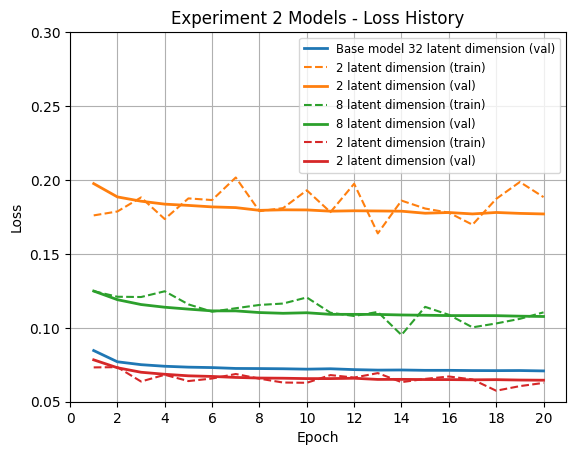

In [ ]:
# plot baseeline validation loss
plot_experiment_history([base_loss], label_list=['Base model 32 latent dimension'])

# plot training and validation losses for experiment 2 models
plot_experiment_history(
    loss_list=experiment_2_losses,
    label_list=[
        '2 latent dimension',
        '8 latent dimension',
        '2 latent dimension'
    ],
    color=plt.get_cmap('tab10').colors[1:],
    to_plot_train=True
)

# format plot
plt.xticks(range(0, base_num_epoch+1, 2))
plt.ylim(0.05, 0.3)
plt.legend(fontsize='small')
plt.title('Experiment 2 Models - Loss History')
plt.grid()

# save plot
plt.savefig("CAE-MNIST/outputs/experiment_2_files/experiment_2_image_loss.png")
plt.show()

In [ ]:
# manually add and push experiment 1 loss curve image to Git repository
!git -C /content/CAE-MNIST add outputs/experiment_2_files/experiment_2_image_loss.png
!git -C /content/CAE-MNIST commit -m "Update experiment 2 loss history curve"
!git -C /content/CAE-MNIST push origin main

[main a9bf42a] Update experiment 2 loss history curve
 1 file changed, 0 insertions(+), 0 deletions(-)
 rewrite outputs/experiment_2_files/experiment_2_image_loss.png (98%)
Enumerating objects: 9, done.
Counting objects: 100% (9/9), done.
Delta compression using up to 2 threads
Compressing objects: 100% (5/5), done.
Writing objects: 100% (5/5), 49.90 KiB | 16.63 MiB/s, done.
Total 5 (delta 3), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/vlad-uve/CAE-MNIST.git
   fcedaff..a9bf42a  main -> main


### 4.2 📷 Reconstruction Quality Analysis

In [ ]:
# get sample images and labels
sample_images, sample_labels = get_image_samples(base_validation_dataloader)

# get reconstructed images from experiment 2
experiment_2_reconstructions=get_experiment_reconstructions(experiment_2_models, sample_images, device)

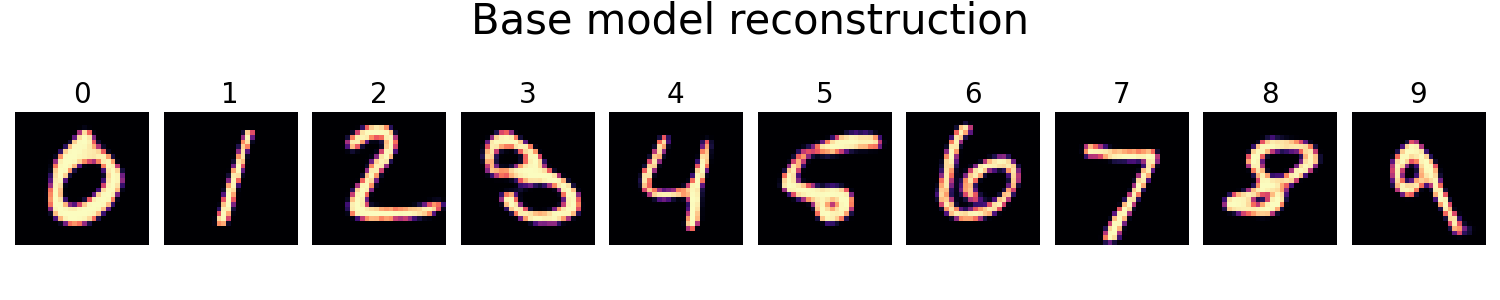

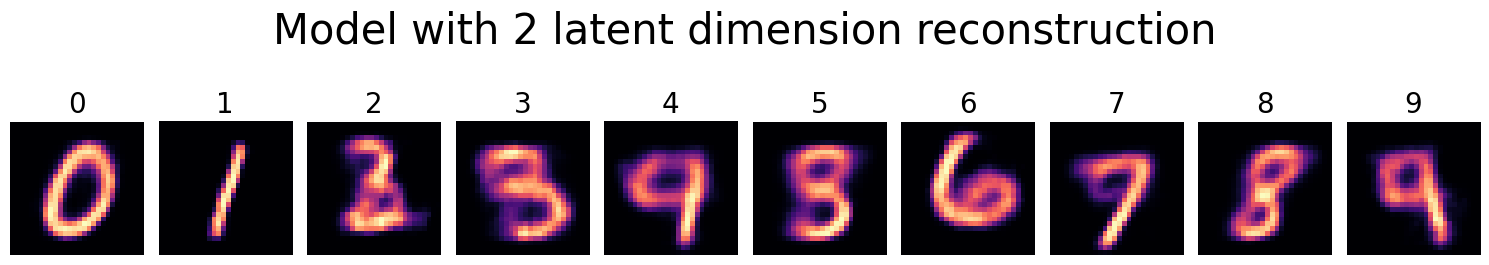

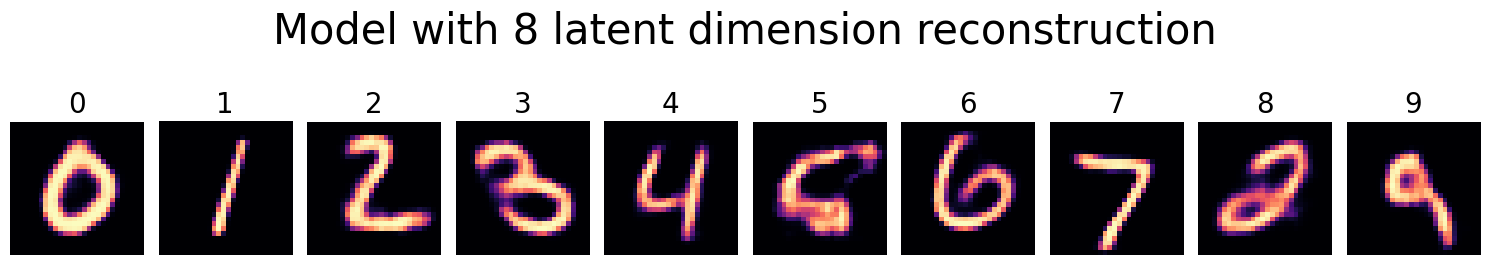

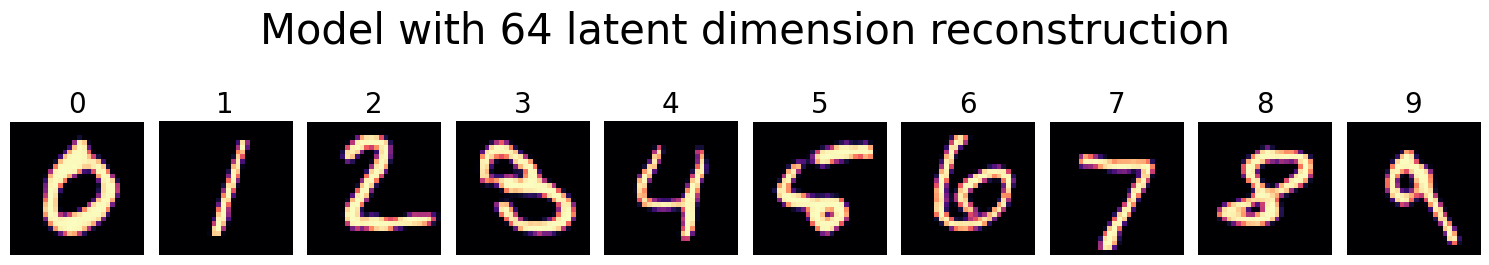

In [ ]:
# display reconsructions from baseline model
display(Image(filename='/content/CAE-MNIST/outputs/base_model_files/base_image_reconstruction.png'))
print('\n')

# display reconstructions from experiment
experiment_2_reconstruction_figures = plot_experiment_reconstructions(
    experiment_2_reconstructions,
    sample_labels,
    title_list=[
        'Model with 2 latent dimension',
        'Model with 8 latent dimension',
        'Model with 64 latent dimension'
    ]
    )

for idx, fig in enumerate(experiment_2_reconstruction_figures):
  fig.savefig(f"CAE-MNIST/outputs/experiment_2_files/experiment_2_image_reconstruction_{idx+1}.png")

In [ ]:
#manually add and push experiment 2 reconstruction images to Git repository
for idx, _ in enumerate(experiment_2_reconstruction_figures):
  !git -C /content/CAE-MNIST add outputs/experiment_2_files/experiment_2_image_reconstruction_{idx+1}.png

!git -C /content/CAE-MNIST commit -m "Update experiment 2 reconstructed digits"
!git -C /content/CAE-MNIST push origin main

[main 833186c] Update experiment 2 reconstructed digits
 3 files changed, 0 insertions(+), 0 deletions(-)
 rewrite outputs/experiment_2_files/experiment_2_image_reconstruction_1.png (99%)
 rewrite outputs/experiment_2_files/experiment_2_image_reconstruction_2.png (99%)
 rewrite outputs/experiment_2_files/experiment_2_image_reconstruction_3.png (99%)
Enumerating objects: 13, done.
Counting objects: 100% (13/13), done.
Delta compression using up to 2 threads
Compressing objects: 100% (7/7), done.
Writing objects: 100% (7/7), 93.09 KiB | 11.64 MiB/s, done.
Total 7 (delta 3), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/vlad-uve/CAE-MNIST.git
   a9bf42a..833186c  main -> main


### 4.3 🧮 Model Complexity Analysis

In [ ]:
# dictionary of model parameters in experiment 5
experiment_2_param_counts = {}

for i, model in enumerate(experiment_2_models):
    param_count = sum(p.numel() for p in model.parameters() if p.requires_grad)
    model_name = f"experiment_2_model_{i+1}"
    experiment_2_param_counts[model_name] = param_count

# print model paramets
print(experiment_2_param_counts)

{'experiment_2_model_1': 75971, 'experiment_2_model_2': 88265, 'experiment_2_model_3': 203009}


## 6. 📂 Export Experiment 2 Files

In [ ]:
# save all experiment 2 outputs (models, losses, reconstructions, description)
save_experiment_files(
    experiment_name="experiment_2",
    models=experiment_2_models,
    losses=experiment_2_losses,
    param_counts_dict=experiment_2_param_counts,
    reconstructions=experiment_2_reconstructions,
    description_text=experiment_2_description
)

✅ Saved experiment_2 files to: /content/CAE_experiment_2_local


In [ ]:
# export experiment 2 files to Git
export_experiment_files(
    experiment_name="experiment_2",
    model_count=len(experiment_2_models)
)

✅ Exported experiment_2 files to: outputs/experiment_2_files/


## Import Experiment 2 Files

In [9]:
# define output path for experiment 2 files
outputs_path = '/content/CAE-MNIST/outputs/experiment_2_files'

# initialize storage lists
experiment_2_models = []
experiment_2_losses = []
experiment_2_reconstructions = []

# loop over latent dimension values used in experiment 2
for idx, latent_dim_i in enumerate(experiment_2_latent_dim):
    # initialize model with specified latent dimension
    model = AutoEncoder(
        n_channels=base_n_channels,
        latent_dim=latent_dim_i
    ).to(device)

    # load model weights
    model_file = f'experiment_2_model_{idx+1}.pth'
    model_path = os.path.join(outputs_path, model_file)
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.eval()
    experiment_2_models.append(model)

    # load loss history
    loss_file = f'experiment_2_loss_{idx+1}.pth'
    loss_path = os.path.join(outputs_path, loss_file)
    loss_history = torch.load(loss_path)
    experiment_2_losses.append(loss_history)

    # load reconstructed images
    reconstructed_file = f'experiment_2_reconstruction_{idx+1}.pth'
    reconstructed_path = os.path.join(outputs_path, reconstructed_file)
    reconstructed_images = torch.load(reconstructed_path)
    experiment_2_reconstructions.append(reconstructed_images)

    # Load param coun dict
    param_counts_file = 'experiment_2_param_counts.pth'
    param_counts_path = os.path.join(outputs_path, param_counts_file)
    experiment_2_param_counts = torch.load(param_counts_path)

# load experiment description
with open(os.path.join(outputs_path, 'experiment_2_description.txt'), 'r') as f:
    experiment_2_description = f.read()

print("✅ All Experiment 2 models, losses, reconstructed images and description loaded.")

✅ All Experiment 2 models, losses, reconstructed images and description loaded.


## Re-Clone Git Repository

In [ ]:
!rm -rf /content/CAE-MNIST
#%cd /content
!git clone {repo_url}

Cloning into 'CAE-MNIST'...
remote: Enumerating objects: 860, done.
remote: Counting objects: 100% (177/177), done.
remote: Compressing objects: 100% (150/150), done.
remote: Total 860 (delta 87), reused 69 (delta 27), pack-reused 683 (from 2)
Receiving objects: 100% (860/860), 32.45 MiB | 26.99 MiB/s, done.
Resolving deltas: 100% (435/435), done.
